# Correlation functions 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import seaborn as sns
import pandas as pd

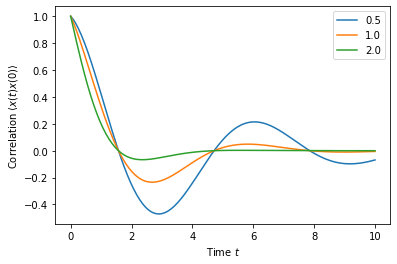

In [3]:
times = np.linspace(0,10.0,200)

a = destroy(2)
x = a.dag() + a
H = a.dag() * a

corr1 = correlation_2op_1t(H, None, times, [np.sqrt(0.5) * a], x, x)
corr2 = correlation_2op_1t(H, None, times, [np.sqrt(1.0) * a], x, x)
corr3 = correlation_2op_1t(H, None, times, [np.sqrt(2.0) * a], x, x)

plt.figure()
plt.plot(times, np.real(corr1), times, np.real(corr2), times, np.real(corr3))
plt.legend(['0.5','1.0','2.0'])
plt.xlabel(r'Time $t$')
plt.ylabel(r'Correlation $\left<x(t)x(0)\right>$')
plt.show()

In [13]:
print(f'x = {x},\na = {a}')

x = Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]],
a = Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]


# Sampling from quadratures

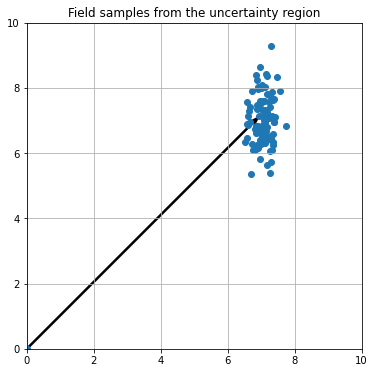

In [166]:
covar = np.array([[0.5,0],[0,5]])*0.1
X = generate_data(mean,covar,theta)
mean = np.array([a.real,a.imag])*np.array([[np.cos(theta),np.cos(theta)],[np.sin(theta),-np.sin(theta)]])
plot_uncertainty_region(X)

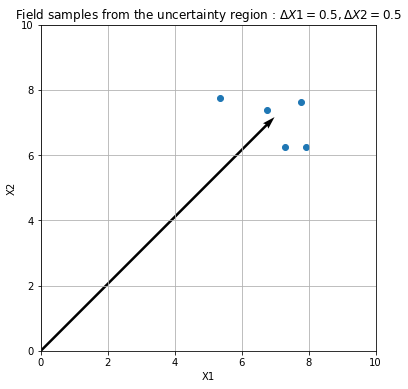

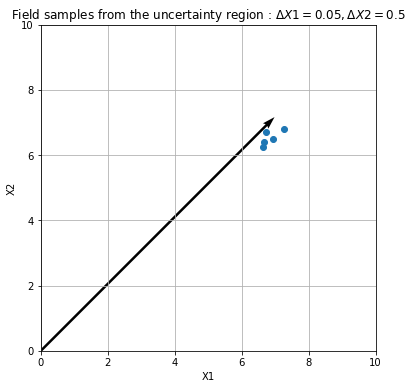

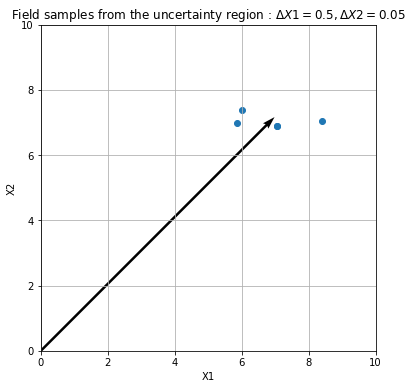

In [198]:
theta = np.pi/4 # phase
amplitude=10
a = amplitude*np.exp(1j*theta) # complex field quantity

numsamples = 5
mean = np.array([a.real,a.imag]) # 
def generate_data(mean,cov,theta):
    da = np.random.multivariate_normal(mean, cov, numsamples)
    for i in range(da.shape[0]):
        for j in range(da.shape[1]):
            da[0],da[1] = np.array([da[0],da[1]])*np.array([[np.cos(theta),np.cos(theta)],[np.sin(theta),-np.sin(theta)]])
            
    return da

cov = [[1/2,0],[0,1/2]]
da = np.random.multivariate_normal(mean, cov, numsamples)

cov_ = np.array([[0.5,0],[0,5]])*0.1
da_ = np.random.multivariate_normal(mean, cov_, numsamples)

cov_1 = np.array([[5,0],[0,0.5]])*0.1
da_1 = np.random.multivariate_normal(mean,cov_1,numsamples)

# print('Amplitude = %i'.format(amplitude))
def plot_uncertainty_region(da,covar):
    
    origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point
    V = np.array([[a.real,a.imag]])
    A = np.array([[a.real+i[0],a.imag+i[1]] for i in da])

    plt.figure(figsize=(6,6))
    plt.title(r'Field samples from the uncertainty region : $\Delta X1 = {}, \Delta X2 = {}$'.format(covar[0][0],covar[1][1]))
    plt.ylabel('X2')
    plt.xlabel('X1')
    plt.quiver(0,0,a.real,a.imag,units='xy', scale=1)
    plt.scatter(da.transpose()[0],da.transpose()[1])
    plt.grid()
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.show()
    
plot_uncertainty_region(da,cov)
plot_uncertainty_region(da_,cov_)
plot_uncertainty_region(da_1,cov_1)

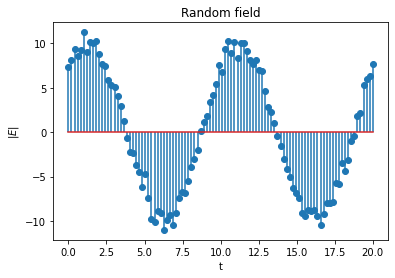

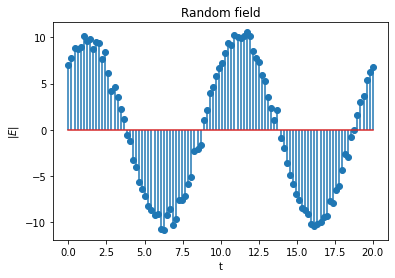

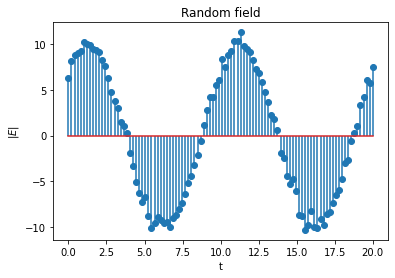

In [189]:
w = 2*np.pi/10
def tvRandomField(w,da):
    t = np.linspace(0,20,100)

    tv_randomfield = []
    for i in range(len(t)):
        fs = da[i][0]*np.cos(w*t[i]) + da[i][1]*np.sin(w*t[i])
        tv_randomfield.append(fs)

    plt.stem(t,tv_randomfield)
    plt.title('Random field')
    plt.xlabel('t')
    plt.ylabel(r'$|E|$')
    plt.show()
    
    return tv_randomfield

tvf1 = tvRandomField(w,da)
tvf2 = tvRandomField(w,da_)
tvf3 = tvRandomField(w,da_1)

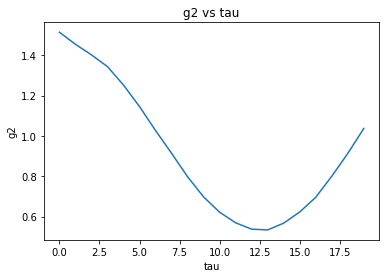

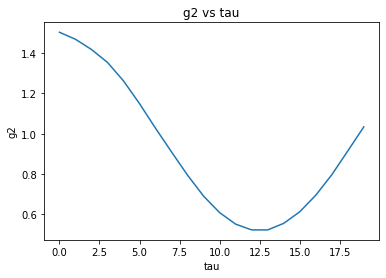

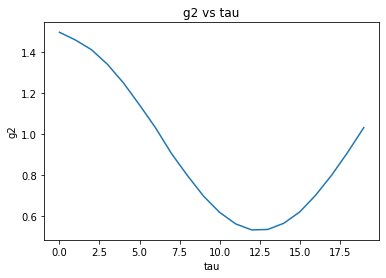

In [197]:
def field_correlation_g2(E,tau):
    E =  np.array(E)
    e = E[tau:] 
    e = np.concatenate([e,E[0:tau]])
        
    g2 = np.mean(E*e*e*E)/(np.mean(E*E)*np.mean(e*e))
    return g2
def plot_g2(tv_randomfield):
    g2_wave=[]
    TAU = np.arange(0,int(t[-1]))
    for i in TAU:
        g2_wave.append(field_correlation_g2(tv_randomfield,i))

    plt.plot(TAU,g2_wave)
    plt.title('g2 vs tau')
    plt.ylabel('g2')
    plt.xlabel('tau')
    plt.show()
        
plot_g2(tvf1)
plot_g2(tvf2)
plot_g2(tvf3)

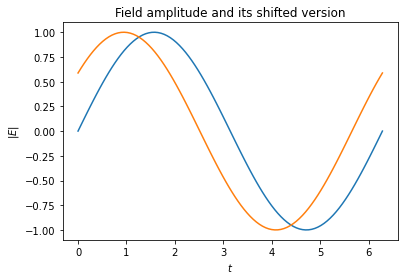

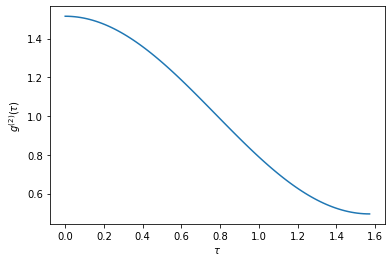

In [123]:
def g2correlation(e1,e2):
    g2 = np.mean(e1*e2)/np.mean(e1)/np.mean(e2)
    return g2
    
    
times = np.linspace(0,np.pi*2,100)
w = 1
T = 2*np.pi
# sinusoid is the input

def shift(w,times,tau):
    return np.sin(w*(times+tau)) 

# E=np.sin(times)
plt.plot(times,shift(w,times,0))
plt.plot(times,shift(w,times,T/10))
plt.title('Field amplitude and its shifted version')
plt.xlabel(r'$t$')
plt.ylabel(r'$\left| E \right|$')
plt.show()

g2 = []
taus = np.linspace(0,T/4,100)
for tau in taus:
    g2.append(g2correlation(shift(w,times,0)**2,shift(w,times,tau)**2))
    
plt.plot(taus,g2)
plt.ylabel(r'$g^{(2)}(\tau)$')
plt.xlabel(r'$\tau$')
plt.show()

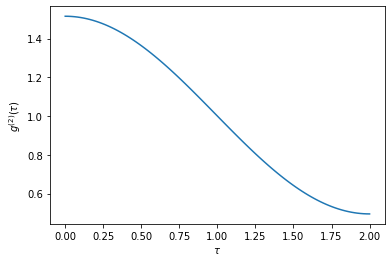

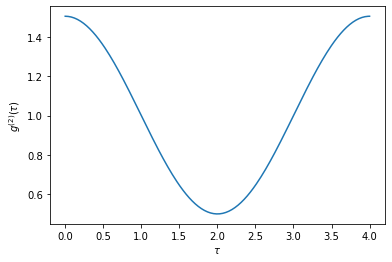

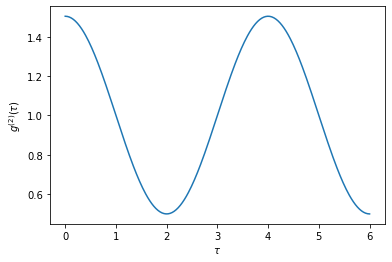

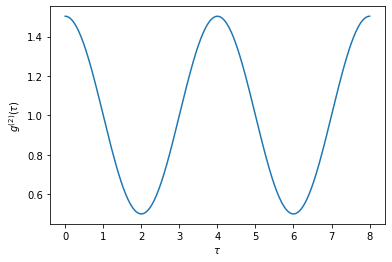

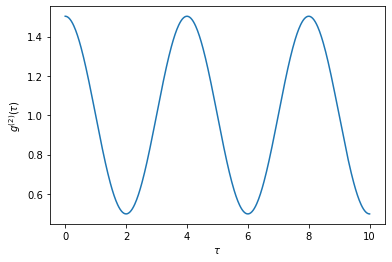

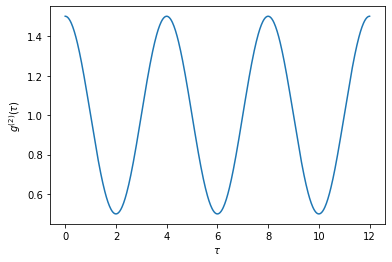

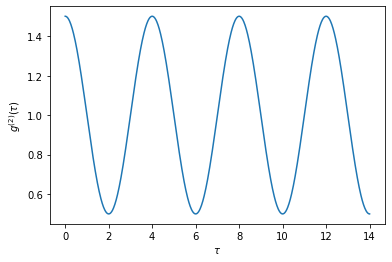

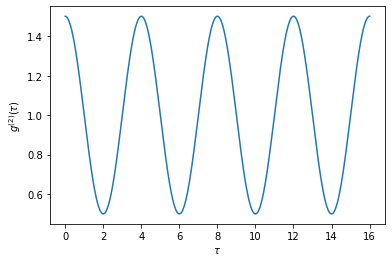

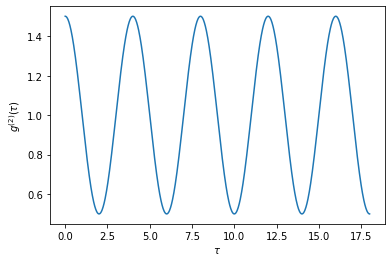

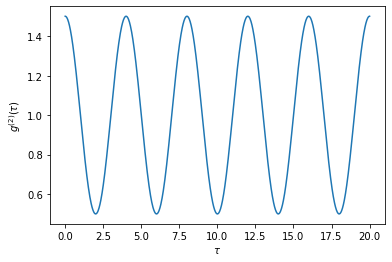

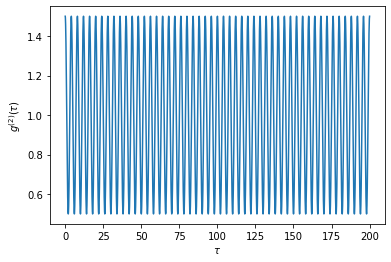

In [210]:
N=1
w=np.pi/4
T=2*np.pi/w


for i in range(10):
    g2 = []
    times = np.linspace(0,N*T,N*100)
    taus = np.linspace(0,N*T/4,N*100)
    for tau in taus:
        g2.append(g2correlation(shift(w,times,0)**2,shift(w,times,tau)**2))

    
    plt.plot(taus,g2)
    plt.ylabel(r'$g^{(2)}(\tau)$')
    plt.xlabel(r'$\tau$')
    plt.show()
    
    N+=1
    if(i==9):
        N = 100       
        g2 = []
        times = np.linspace(0,N*T,N*100)
        taus = np.linspace(0,N*T/4,N*100)
        for tau in taus:
            g2.append(g2correlation(shift(w,times,0)**2,shift(w,times,tau)**2))


        plt.plot(taus,g2)
        plt.ylabel(r'$g^{(2)}(\tau)$')
        plt.xlabel(r'$\tau$')
        plt.show()
        
